# Module 2 - assignment
 The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [56]:
column_list=['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

df=df[column_list]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

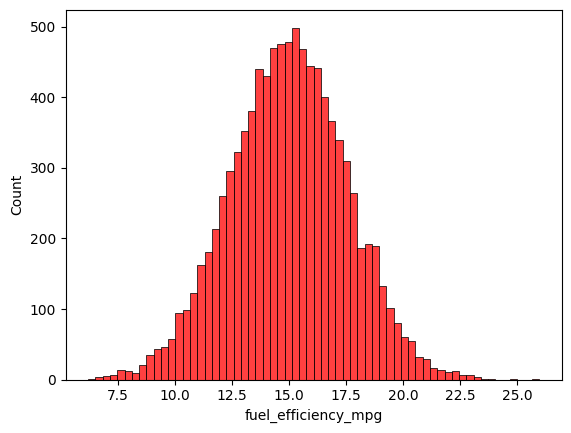

In [19]:
import seaborn as sns
sns.histplot(df.fuel_efficiency_mpg,color='red')
# no long tail, no need to convert in logrithmic format

In [57]:
df.isnull().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [58]:
df.horsepower.median()

np.float64(149.0)

# Data prep

In [7]:
def data_prep(seed_value):
    print (seed_value)
    np.random.seed(seed_value)

    n=len(df)
    column_list=['engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg']
    
    df=df[column_list]
    # print("number of records in df %s" % n)

    idx=np.arange(n)
    np.random.shuffle(idx)

    # train - 60%, val - 20%, test - 20%
    n_val=int(n * 0.2)
    n_test=int(n * 0.2)
    n_train= n - n_val - n_test

    # print("Record count for all datasets -",n_val , n_test , n_train, n_val + n_test + n_train)

    df_train=df.iloc[idx[:n_train]]
    df_val=df.iloc[idx[n_train:n_train+n_val]]
    df_test=df.iloc[idx[n_train+n_val:]]

    # drop index to avoid any confusion 

    df_train=df_train.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)

    # convert target matrix to logrithmic form

    # y_train=np.log1p(df_train.fuel_efficiency_mpg.values)
    # y_val=np.log1p(df_val.fuel_efficiency_mpg.values)
    # y_test=np.log1p(df_test.fuel_efficiency_mpg.values)

    y_train=df_train.fuel_efficiency_mpg.values
    y_val=df_val.fuel_efficiency_mpg.values
    y_test=df_test.fuel_efficiency_mpg.values

    # remove target from feature matrix

    del df_train['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    return df_train,df_val,df_test,y_train,y_val,y_test

# Data Cleaning

In [ ]:
# Replacing missing value with 0

# df['horsepower']=df.horsepower.fillna(0)

In [60]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [38]:
def prepare_withzero__X(df):
    df = df.copy() # avoid overwriting df
    df['horsepower']=df.horsepower.fillna(0)
    X=df.values
    return X

In [41]:
df.horsepower.describe()

count    9704.000000
mean      138.738355
std        48.401189
min         0.000000
25%       124.000000
50%       146.000000
75%       168.000000
max       271.000000
Name: horsepower, dtype: float64

In [62]:
df.horsepower.mean()

np.float64(149.65729212983547)

In [4]:
def prepare_X(df,mean):
    df_new = df.copy() # avoid overwriting df

    if mean:
        # print("Replacing null values with mean")
        fvalue=df_new.horsepower.mean()
    else:
        # print("Replacing null values with 0")
        fvalue=0
    # print("fvalue", fvalue)
    df_new['horsepower']=df_new.horsepower.fillna(fvalue)
    X=df_new.values
    return X

In [5]:
def train_linear_regression(X,y):

    ones=np.ones(X.shape[0])
    X=np.column_stack((ones,X))
    # adding bias term to feature matrix

    XTX=np.dot(X.T,X)
    XTX_inv=np.linalg.inv(XTX)
    # w = (X^T X)^(-1) X^T y
    # adding bias term to feature matrix

    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [75]:
x_train=prepare_X(df=df_train,mean=False)
w0,w=train_linear_regression(x_train,y_train)
print(w0)
w

Replacing null values with 0
fvalue 0
28.827365474598718


array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04])

In [77]:
x_train_mean=prepare_X(df=df_train,mean=True)
w0_mean,w_mean=train_linear_regression(x_train_mean,y_train)
print(w0_mean)
w_mean


Replacing null values with mean
fvalue 149.54476367006487
28.92525995211667


array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463])

In [65]:
def rmse(y,y_pred):

    se=(y - y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [88]:
# validation with zero replacement
X_val=prepare_X(df_val,0)
y_pred= w0+ X_val.dot(w)

score=rmse(y_val,y_pred)
round(score,2)

Replacing null values with 0
fvalue 0


np.float64(0.52)

<Axes: ylabel='Count'>

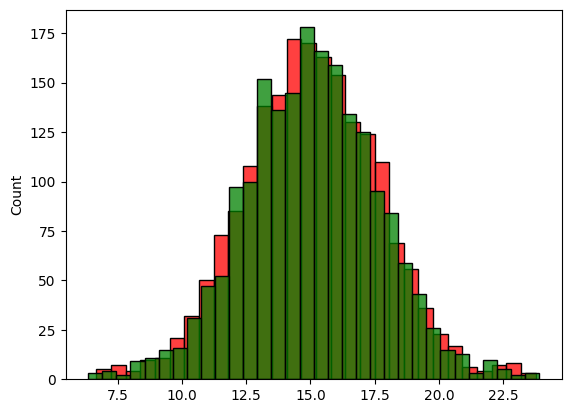

In [89]:
sns.histplot(y_val,color='red')
sns.histplot(y_pred,color='green')

In [90]:
# validation with mean replacement

X_val=prepare_X(df_val,1)
y_pred= w0_mean+ X_val.dot(w_mean)

score=rmse(y_val,y_pred)
round(score,2)

Replacing null values with mean
fvalue 150.03270509977827


np.float64(0.46)

<Axes: ylabel='Count'>

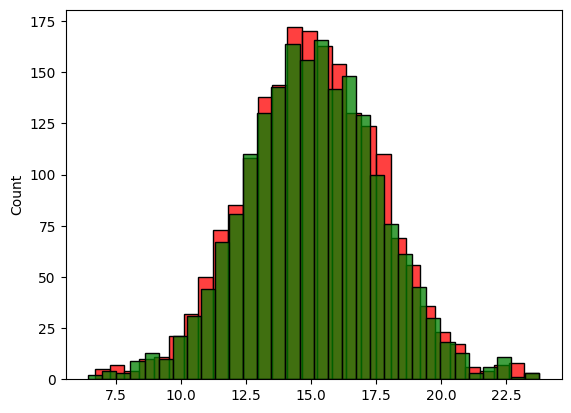

In [91]:
sns.histplot(y_val,color='red')
sns.histplot(y_pred,color='green')

In [84]:
# mean rmse np.float64(0.46) is better then zero np.float64(0.52)


In [92]:
# regularised linear regression
def train_linear_regression_regularised(X,y,r=0.001):

    ones=np.ones(X.shape[0])
    X=np.column_stack((ones,X))
    # adding bias term to feature matrix

    XTX=np.dot(X.T,X)

    # regularisation step
    XTX= XTX+ r * np.eye(XTX.shape[0])

    XTX_inv=np.linalg.inv(XTX)
    # w = (X^T X)^(-1) X^T y
    # adding bias term to feature matrix

    w_full=XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [96]:
x_train=prepare_X(df_train,0)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0,w=train_linear_regression_regularised(x_train,y_train,r)
    X_val=prepare_X(df_val,0)

    y_pred= w0+ X_val.dot(w)

    score=rmse(y_val,y_pred)

    # score=round(score,2)
    print(r, score)


Replacing null values with 0
fvalue 0
Replacing null values with 0
fvalue 0
0 0.5173782638841185
Replacing null values with 0
fvalue 0
0.01 0.5171115525775559
Replacing null values with 0
fvalue 0
0.1 0.5187525130701629
Replacing null values with 0
fvalue 0
1 0.5222348802092528
Replacing null values with 0
fvalue 0
5 0.5228916092823455
Replacing null values with 0
fvalue 0
10 0.5229812979636569
Replacing null values with 0
fvalue 0
100 0.5230636233819926


In [ ]:
import pandas as pd
import numpy as np
df.head()df=pd.read_csv("car_fuel_efficiency.csv")


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [15]:
def data_prep(seed_value):
    print (seed_value)
    np.random.seed(seed_value)
    df=pd.read_csv("car_fuel_efficiency.csv")

    column_list=['engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg']
    
    df=df[column_list]
    n=len(df)

    # print("number of records in df %s" % n)

    idx=np.arange(n)
    np.random.shuffle(idx)

    # train - 60%, val - 20%, test - 20%
    n_val=int(n * 0.2)
    n_test=int(n * 0.2)
    n_train= n - n_val - n_test

    # print("Record count for all datasets -",n_val , n_test , n_train, n_val + n_test + n_train)

    df_train=df.iloc[idx[:n_train]]
    df_val=df.iloc[idx[n_train:n_train+n_val]]
    df_test=df.iloc[idx[n_train+n_val:]]

    # drop index to avoid any confusion 

    df_train=df_train.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)

    # convert target matrix to logrithmic form

    # y_train=np.log1p(df_train.fuel_efficiency_mpg.values)
    # y_val=np.log1p(df_val.fuel_efficiency_mpg.values)
    # y_test=np.log1p(df_test.fuel_efficiency_mpg.values)

    y_train=df_train.fuel_efficiency_mpg.values
    y_val=df_val.fuel_efficiency_mpg.values
    y_test=df_test.fuel_efficiency_mpg.values

    # remove target from feature matrix

    del df_train['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    return df_train,df_val,df_test,y_train,y_val,y_test

In [13]:
def prepare_X(df,mean):
    df_new = df.copy() # avoid overwriting df

    if mean:
        # print("Replacing null values with mean")
        fvalue=df_new.horsepower.mean()
    else:
        # print("Replacing null values with 0")
        fvalue=0
    # print("fvalue", fvalue)
    df_new['horsepower']=df_new.horsepower.fillna(fvalue)
    X=df_new.values
    return X

def train_linear_regression(X,y):

    ones=np.ones(X.shape[0])
    X=np.column_stack((ones,X))
    # adding bias term to feature matrix

    XTX=np.dot(X.T,X)
    XTX_inv=np.linalg.inv(XTX)
    # w = (X^T X)^(-1) X^T y
    # adding bias term to feature matrix

    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

def rmse(y,y_pred):

    se=(y - y_pred)**2
    mse=se.mean()
    return np.sqrt(mse)

In [16]:
scores = {}
for seed in [0,1,2,3,4,5,6,7,8,9]:
    df_train,df_val,df_test,y_train,y_val,y_test = data_prep(seed)
    x_train = prepare_X(df=df_train, mean=False)
    w0,w = train_linear_regression(x_train, y_train)

    X_val = prepare_X(df_val, mean=False)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores[seed] = score

std = round(np.std(list(scores.values())), 3)
print(std)

0
1
2
3
4
5
6
7
8
9
0.007


In [ ]:
# round(np.std(list(dict.values())),3)

np.float64(0.007)